<h3 style="text-align: center;">ESCUELA TÉCNICA SUPERIOR DE INGENIERÍA INFORMÁTICA</h3>
<h3 style="text-align: center;">UNIVERSIDAD DE SEVILLA</h3>
<h3 style="text-align: center;">MATEMÁTICAS PARA LA COMPUTACIÓN</h3>
<h3 style="text-align: center;">Primera práctica de laboratorio</h3>
<p> </p>
<h3>Alumno: </h3> <h4>Jesús Manuel Sánchez Alanís</h4>
<h3>Cuestionario: </h3> <h4>1</h4>

<h2>Ejercicio 1</h2>

<h3>Apartado a</h3>

En primer lugar, modelamos el problema en forma de grafo.

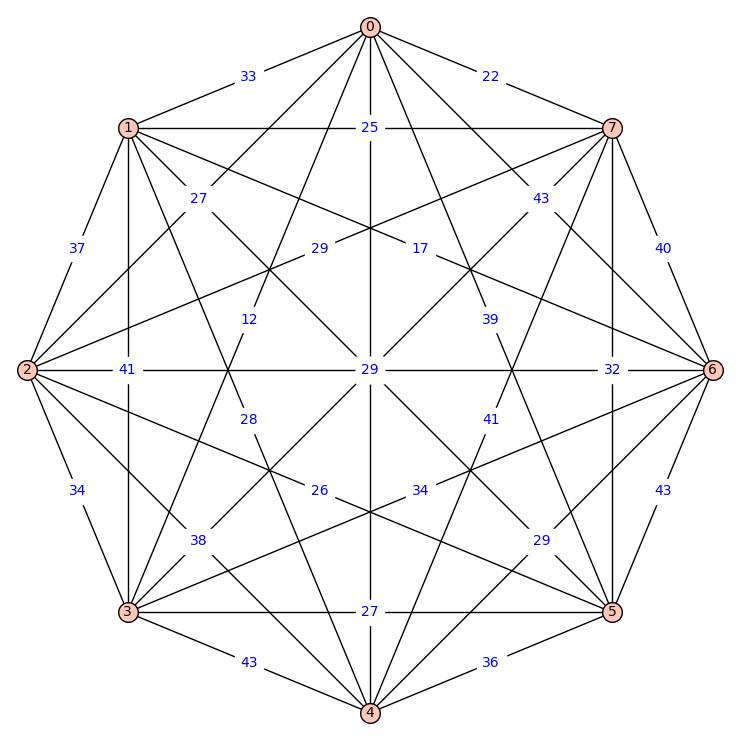

In [1]:
G = Graph(weighted=True)
aristas=[('0','1',33),('0','2',27),('0','3',12),('0','4',41),('0','5',39),('0','6',43),('0','7',22),
        ('1','0',33),('1','2',37),('1','3',41),('1','4',28),('1','5',30),('1','6',17),('1','7',25),
        ('2','0',27),('2','1',37),('2','3',34),('2','4',38),('2','5',26),('2','6',31),('2','7',29),
        ('3','0',12),('3','1',41),('3','2',34),('3','4',43),('3','5',27),('3','6',34),('3','7',29),
        ('4','0',41),('4','1',28),('4','2',38),('4','3',43),('4','5',36),('4','6',29),('4','7',41),
        ('5','0',39),('5','1',30),('5','2',26),('5','3',27),('5','4',36),('5','6',43),('5','7',32),
        ('6','0',43),('6','1',17),('6','2',31),('6','3',34),('6','4',29),('6','5',43),('6','7',40),
        ('7','0',22),('7','1',25),('7','2',29),('7','3',29),('7','4',41),('7','5',32),('7','6',40)]
G.add_edges(aristas)
G.plot(figsize=10,edge_labels=True,layout='circular')

Creamos una variable para almacenar los pesos de cada arista

[('0', '1', 33), ('0', '2', 27), ('0', '3', 12), ('0', '4', 41), ('0', '5', 39), ('0', '6', 43), ('0', '7', 22), ('1', '2', 37), ('1', '3', 41), ('1', '4', 28), ('1', '5', 30), ('1', '6', 17), ('1', '7', 25), ('2', '3', 34), ('2', '4', 38), ('2', '5', 26), ('2', '6', 31), ('2', '7', 29), ('3', '4', 43), ('3', '5', 27), ('3', '6', 34), ('3', '7', 29), ('4', '5', 36), ('4', '6', 29), ('4', '7', 41), ('5', '6', 43), ('5', '7', 32), ('6', '7', 40)]


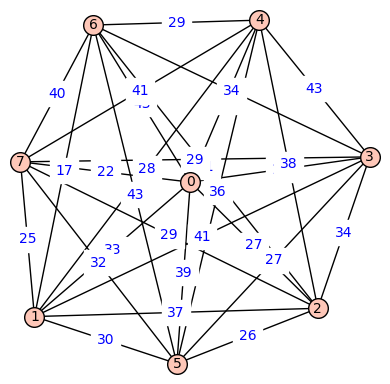

In [2]:
w = {};
for e in G.edges():
    u,v,l = e;
    w[(u,v)] = e[2];
    G.set_edge_label(u, v, w[(u,v)]);
print (G.edges());
G.show(edge_labels=True);

Transformamos el problema en un problema de Programación Entera

In [3]:
p = MixedIntegerLinearProgram(maximization=False);

x = p.new_variable();
edge_labels = {};

ecount = 0;

for e in G.edges():
    edge_labels[(e[0],e[1])] = ecount;
    p.set_integer(x[ecount]);
    p.set_min(x[ecount],0);
    p.set_max(x[ecount],1);
    ecount += 1;
    
    edge_labels[(e[1],e[0])] = ecount;
    p.set_integer(x[ecount]);
    p.set_min(x[ecount],0);
    p.set_max(x[ecount],1);
    ecount += 1;
    
for u in G.vertices():
    p.add_constraint( sum( x[edge_labels[(u,v)]] for v in G.neighbors(u) ) == 1 );
    p.add_constraint( sum( x[edge_labels[(v,u)]] for v in G.neighbors(u) ) == 1 );

p.set_objective( sum( w[(e[0],e[1])] * x[edge_labels[(e[0],e[1])]] for e in G.edges() ) + sum( w[(e[0],e[1])] * x[edge_labels[(e[1],e[0])]] for e in G.edges() ) );

In [4]:
p.show()

Minimization:
  33.0 x_0 + 33.0 x_1 + 27.0 x_2 + 27.0 x_3 + 12.0 x_4 + 12.0 x_5 + 41.0 x_6 + 41.0 x_7 + 39.0 x_8 + 39.0 x_9 + 43.0 x_10 + 43.0 x_11 + 22.0 x_12 + 22.0 x_13 + 37.0 x_14 + 37.0 x_15 + 41.0 x_16 + 41.0 x_17 + 28.0 x_18 + 28.0 x_19 + 30.0 x_20 + 30.0 x_21 + 17.0 x_22 + 17.0 x_23 + 25.0 x_24 + 25.0 x_25 + 34.0 x_26 + 34.0 x_27 + 38.0 x_28 + 38.0 x_29 + 26.0 x_30 + 26.0 x_31 + 31.0 x_32 + 31.0 x_33 + 29.0 x_34 + 29.0 x_35 + 43.0 x_36 + 43.0 x_37 + 27.0 x_38 + 27.0 x_39 + 34.0 x_40 + 34.0 x_41 + 29.0 x_42 + 29.0 x_43 + 36.0 x_44 + 36.0 x_45 + 29.0 x_46 + 29.0 x_47 + 41.0 x_48 + 41.0 x_49 + 43.0 x_50 + 43.0 x_51 + 32.0 x_52 + 32.0 x_53 + 40.0 x_54 + 40.0 x_55 

Constraints:
  1.0 <= x_0 + x_2 + x_4 + x_6 + x_8 + x_10 + x_12 <= 1.0
  1.0 <= x_1 + x_3 + x_5 + x_7 + x_9 + x_11 + x_13 <= 1.0
  1.0 <= x_1 + x_14 + x_16 + x_18 + x_20 + x_22 + x_24 <= 1.0
  1.0 <= x_0 + x_15 + x_17 + x_19 + x_21 + x_23 + x_25 <= 1.0
  1.0 <= x_3 + x_15 + x_26 + x_28 + x_30 + x_32 + x_34 <= 1.0
  1.0 <

In [5]:
show(p.solve())

184.0

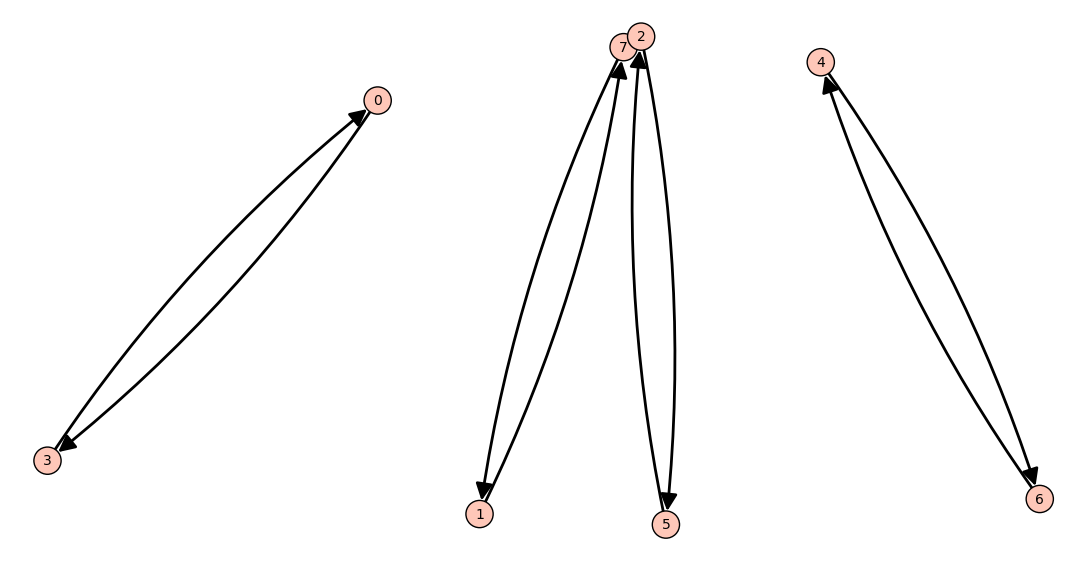

In [6]:
vals = p.get_values(x);
H = DiGraph();

for u,v,l in G.edges():
    if vals[ edge_labels[ (u,v) ] ] > 0:
        H.add_edge(u,v);
    if vals[ edge_labels[ (v,u) ] ] > 0:
        H.add_edge(v,u);
H.show(figsize=11);

Tras resolver el problema sin restricciones adicionales, hemos obtenido como valor de la función objetivo un peso de 184 y 4 subtours

A continuación, vamos a añadir restricciones de corte. Para ello, escogemos un subconjunto cualquiera de los obtenidos al resolver el problema sin restricciones adicionales

189.0

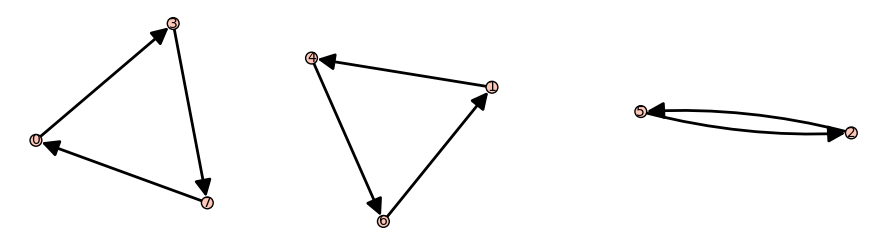

In [7]:
#Subconjunto
S = ['0','3']
#Subconjunto complementario(el resto de los vértices)
Sc = ['1','7','2','5','6','4']

elist = [];
for u in S:
    for v in Sc:
        if G.has_edge(u,v):
            elist.append( (u,v) );

p.add_constraint( sum( x[edge_labels[e]] for e in elist) >= 1 );
show(p.solve());
vals = p.get_values(x);
H = DiGraph();


for u,v,l in G.edges():
    if vals[ edge_labels[ (u,v) ] ] > 0:
        H.add_edge(u,v);
    if vals[ edge_labels[ (v,u) ] ] > 0:
        H.add_edge(v,u);
H.show(figsize=9);

In [8]:
p.show()

Minimization:
  33.0 x_0 + 33.0 x_1 + 27.0 x_2 + 27.0 x_3 + 12.0 x_4 + 12.0 x_5 + 41.0 x_6 + 41.0 x_7 + 39.0 x_8 + 39.0 x_9 + 43.0 x_10 + 43.0 x_11 + 22.0 x_12 + 22.0 x_13 + 37.0 x_14 + 37.0 x_15 + 41.0 x_16 + 41.0 x_17 + 28.0 x_18 + 28.0 x_19 + 30.0 x_20 + 30.0 x_21 + 17.0 x_22 + 17.0 x_23 + 25.0 x_24 + 25.0 x_25 + 34.0 x_26 + 34.0 x_27 + 38.0 x_28 + 38.0 x_29 + 26.0 x_30 + 26.0 x_31 + 31.0 x_32 + 31.0 x_33 + 29.0 x_34 + 29.0 x_35 + 43.0 x_36 + 43.0 x_37 + 27.0 x_38 + 27.0 x_39 + 34.0 x_40 + 34.0 x_41 + 29.0 x_42 + 29.0 x_43 + 36.0 x_44 + 36.0 x_45 + 29.0 x_46 + 29.0 x_47 + 41.0 x_48 + 41.0 x_49 + 43.0 x_50 + 43.0 x_51 + 32.0 x_52 + 32.0 x_53 + 40.0 x_54 + 40.0 x_55 

Constraints:
  1.0 <= x_0 + x_2 + x_4 + x_6 + x_8 + x_10 + x_12 <= 1.0
  1.0 <= x_1 + x_3 + x_5 + x_7 + x_9 + x_11 + x_13 <= 1.0
  1.0 <= x_1 + x_14 + x_16 + x_18 + x_20 + x_22 + x_24 <= 1.0
  1.0 <= x_0 + x_15 + x_17 + x_19 + x_21 + x_23 + x_25 <= 1.0
  1.0 <= x_3 + x_15 + x_26 + x_28 + x_30 + x_32 + x_34 <= 1.0
  1.0 <

Tras añadir la restricción de corte x_0 + x_2 + x_6 + x_8 + x_10 + x_12 + x_17 + x_27 + x_36 + x_38 + x_40 + x_42 => 1.0

hemos obtenido nuevos subtours y ha aumentado el valor de la función objetivo.

Para seguir eliminando subtours, volvemos a repetir el paso anterior

In [9]:
S = ['1','6','4'];
Sc = ['0','3','7','5','2'];
elist = [];
for u in S:
    for v in Sc:
        if G.has_edge(u,v):
            elist.append( (u,v) );

p.add_constraint( sum( x[edge_labels[e]] for e in elist) >= 1 );
vals = p.get_values(x);
H = DiGraph();


for u,v,l in G.edges():
    if vals[ edge_labels[ (u,v) ] ] > 0:
        H.add_edge(u,v);
    if vals[ edge_labels[ (v,u) ] ] > 0:
        H.add_edge(v,u);

p.show();

196.0

Minimization:
  33.0 x_0 + 33.0 x_1 + 27.0 x_2 + 27.0 x_3 + 12.0 x_4 + 12.0 x_5 + 41.0 x_6 + 41.0 x_7 + 39.0 x_8 + 39.0 x_9 + 43.0 x_10 + 43.0 x_11 + 22.0 x_12 + 22.0 x_13 + 37.0 x_14 + 37.0 x_15 + 41.0 x_16 + 41.0 x_17 + 28.0 x_18 + 28.0 x_19 + 30.0 x_20 + 30.0 x_21 + 17.0 x_22 + 17.0 x_23 + 25.0 x_24 + 25.0 x_25 + 34.0 x_26 + 34.0 x_27 + 38.0 x_28 + 38.0 x_29 + 26.0 x_30 + 26.0 x_31 + 31.0 x_32 + 31.0 x_33 + 29.0 x_34 + 29.0 x_35 + 43.0 x_36 + 43.0 x_37 + 27.0 x_38 + 27.0 x_39 + 34.0 x_40 + 34.0 x_41 + 29.0 x_42 + 29.0 x_43 + 36.0 x_44 + 36.0 x_45 + 29.0 x_46 + 29.0 x_47 + 41.0 x_48 + 41.0 x_49 + 43.0 x_50 + 43.0 x_51 + 32.0 x_52 + 32.0 x_53 + 40.0 x_54 + 40.0 x_55 

Constraints:
  1.0 <= x_0 + x_2 + x_4 + x_6 + x_8 + x_10 + x_12 <= 1.0
  1.0 <= x_1 + x_3 + x_5 + x_7 + x_9 + x_11 + x_13 <= 1.0
  1.0 <= x_1 + x_14 + x_16 + x_18 + x_20 + x_22 + x_24 <= 1.0
  1.0 <= x_0 + x_15 + x_17 + x_19 + x_21 + x_23 + x_25 <= 1.0
  1.0 <= x_3 + x_15 + x_26 + x_28 + x_30 + x_32 + x_34 <= 1.0
  1.0 <

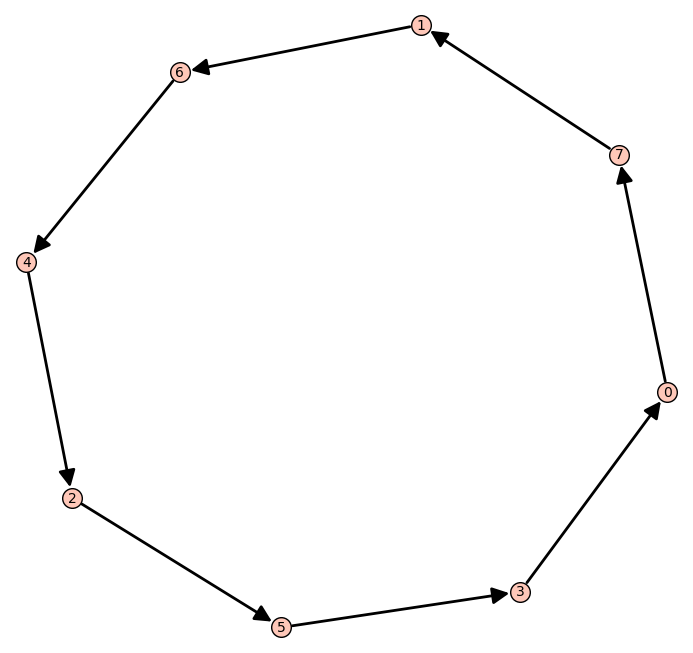

In [10]:
show(p.solve());
H.show(figsize = 5)

Al añadir la restricción x_1 + x_7 + x_11 + x_14 + x_16 + x_20 + x_24 + x_29 + x_33 + x_37 + x_41 + x_44 + x_48 + x_51 + x_54 => 1.0 seguimos teniendo varios ciclos. Repetimos el paso anterior

Ya tenemos una solución al problema. Hemos añadido 2 restricciones de corte

| Iter. | Subciclo | Restriccion | Z |
|:----:|:----:|:----:|:----:|
| 1 | 0 - 3 | x_0 + x_2 + x_6 + x_8 + x_10 + x_12 + x_17 + x_27 + x_36 + x_38 + x_40 + x_42 => 1.0 | 189 |
| 2 | 1 - 6 - 4 | x_1 + x_7 + x_11 + x_14 + x_16 + x_20 + x_24 + x_29 + x_33 + x_37 + x_41 + x_44 + x_48 + x_51 + x_54 => 1.0 | 196 | 

<h3>Apartado b</h3>

En este caso, tenemos un problema asimetrico, por lo que tenemos que volver a modelar el grafo

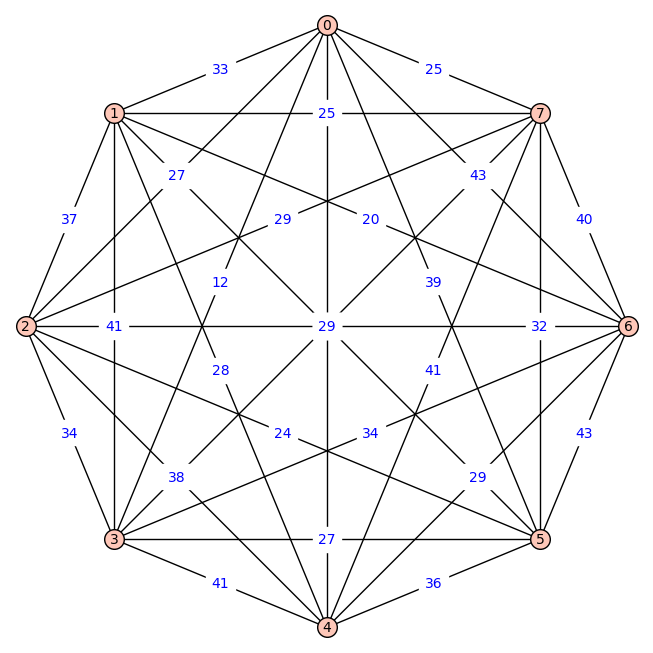

In [11]:
G2 = Graph(weighted=True)
aristas=[('0','1',33),('0','2',27),('0','3',12),('0','4',41),('0','5',39),('0','6',43),('0','7',22),
        ('1','0',33),('1','2',37),('1','3',41),('1','4',28),('1','5',30),('1','6',17),('1','7',25),
        ('2','0',27),('2','1',37),('2','3',34),('2','4',38),('2','5',26),('2','6',31),('2','7',29),
        ('3','0',12),('3','1',41),('3','2',34),('3','4',43),('3','5',27),('3','6',34),('3','7',29),
        ('4','0',41),('4','1',28),('4','2',38),('4','3',41),('4','5',36),('4','6',29),('4','7',41),
        ('5','0',39),('5','1',30),('5','2',24),('5','3',27),('5','4',36),('5','6',43),('5','7',32),
        ('6','0',43),('6','1',20),('6','2',31),('6','3',34),('6','4',29),('6','5',43),('6','7',40),
        ('7','0',25),('7','1',25),('7','2',29),('7','3',29),('7','4',41),('7','5',32),('7','6',40)]
G2.add_edges(aristas)
G2.plot(figsize=10,edge_labels=True,layout='circular')

Una vez modelado el grafo, repetimos los pasos del apartado a

[('0', '1', 33), ('0', '2', 27), ('0', '3', 12), ('0', '4', 41), ('0', '5', 39), ('0', '6', 43), ('0', '7', 25), ('1', '2', 37), ('1', '3', 41), ('1', '4', 28), ('1', '5', 30), ('1', '6', 20), ('1', '7', 25), ('2', '3', 34), ('2', '4', 38), ('2', '5', 24), ('2', '6', 31), ('2', '7', 29), ('3', '4', 41), ('3', '5', 27), ('3', '6', 34), ('3', '7', 29), ('4', '5', 36), ('4', '6', 29), ('4', '7', 41), ('5', '6', 43), ('5', '7', 32), ('6', '7', 40)]


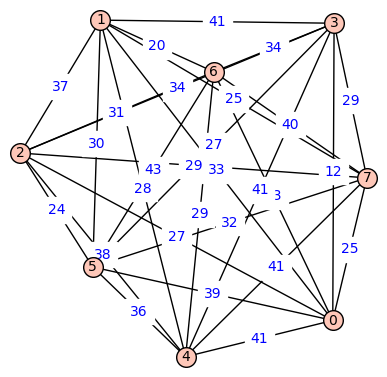

In [12]:
w = {};
for e in G2.edges():
    u,v,l = e;
    w[(u,v)] = e[2];
    G2.set_edge_label(u, v, w[(u,v)]);
print (G2.edges());
G2.show(edge_labels=True);

In [13]:
p2 = MixedIntegerLinearProgram(maximization=False);

x = p2.new_variable();
edge_labels = {};

ecount = 0;

for e in G2.edges():
    edge_labels[(e[0],e[1])] = ecount;
    p2.set_integer(x[ecount]);
    p2.set_min(x[ecount],0);
    p2.set_max(x[ecount],1);
    ecount += 1;
    
    edge_labels[(e[1],e[0])] = ecount;
    p2.set_integer(x[ecount]);
    p2.set_min(x[ecount],0);
    p2.set_max(x[ecount],1);
    ecount += 1;
    
for u in G2.vertices():
    p2.add_constraint( sum( x[edge_labels[(u,v)]] for v in G2.neighbors(u) ) == 1 );
    p2.add_constraint( sum( x[edge_labels[(v,u)]] for v in G2.neighbors(u) ) == 1 );

p2.set_objective( sum( w[(e[0],e[1])] * x[edge_labels[(e[0],e[1])]] for e in G2.edges() ) + sum( w[(e[0],e[1])] * x[edge_labels[(e[1],e[0])]] for e in G2.edges() ) );

In [14]:
p2.show()

Minimization:
  33.0 x_0 + 33.0 x_1 + 27.0 x_2 + 27.0 x_3 + 12.0 x_4 + 12.0 x_5 + 41.0 x_6 + 41.0 x_7 + 39.0 x_8 + 39.0 x_9 + 43.0 x_10 + 43.0 x_11 + 25.0 x_12 + 25.0 x_13 + 37.0 x_14 + 37.0 x_15 + 41.0 x_16 + 41.0 x_17 + 28.0 x_18 + 28.0 x_19 + 30.0 x_20 + 30.0 x_21 + 20.0 x_22 + 20.0 x_23 + 25.0 x_24 + 25.0 x_25 + 34.0 x_26 + 34.0 x_27 + 38.0 x_28 + 38.0 x_29 + 24.0 x_30 + 24.0 x_31 + 31.0 x_32 + 31.0 x_33 + 29.0 x_34 + 29.0 x_35 + 41.0 x_36 + 41.0 x_37 + 27.0 x_38 + 27.0 x_39 + 34.0 x_40 + 34.0 x_41 + 29.0 x_42 + 29.0 x_43 + 36.0 x_44 + 36.0 x_45 + 29.0 x_46 + 29.0 x_47 + 41.0 x_48 + 41.0 x_49 + 43.0 x_50 + 43.0 x_51 + 32.0 x_52 + 32.0 x_53 + 40.0 x_54 + 40.0 x_55 

Constraints:
  1.0 <= x_0 + x_2 + x_4 + x_6 + x_8 + x_10 + x_12 <= 1.0
  1.0 <= x_1 + x_3 + x_5 + x_7 + x_9 + x_11 + x_13 <= 1.0
  1.0 <= x_1 + x_14 + x_16 + x_18 + x_20 + x_22 + x_24 <= 1.0
  1.0 <= x_0 + x_15 + x_17 + x_19 + x_21 + x_23 + x_25 <= 1.0
  1.0 <= x_3 + x_15 + x_26 + x_28 + x_30 + x_32 + x_34 <= 1.0
  1.0 <

180.0

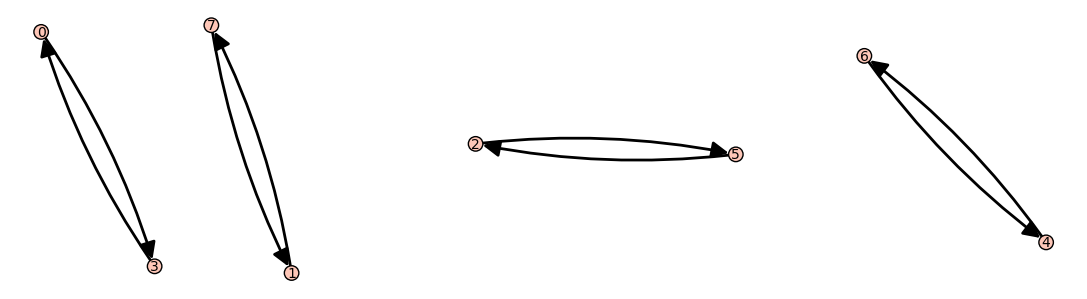

In [15]:
show(p2.solve());
vals = p2.get_values(x);
H2 = DiGraph();

for u,v,l in G2.edges():
    if vals[ edge_labels[ (u,v) ] ] > 0:
        H2.add_edge(u,v);
    if vals[ edge_labels[ (v,u) ] ] > 0:
        H2.add_edge(v,u);
H2.show(figsize=11);

Tras resolver el problema sin restricciones adicionales, hemos obtenido como valor de la función objetivo un peso de 180 y 4 subtours

A continuación, vamos a añadir restricciones de corte. Para ello, escogemos un subconjunto cualquiera de los obtenidos al resolver el problema sin restricciones adicionales

191.0

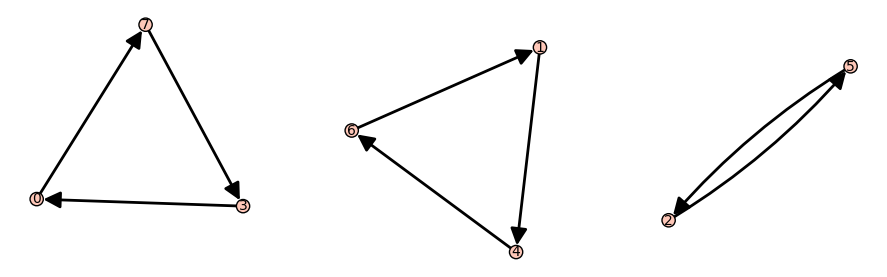

In [16]:
#Subconjunto
S = ['0','3']
#Subconjunto complementario(el resto de los vértices)
Sc = ['1','7','2','5','6','4']

elist = [];
for u in S:
    for v in Sc:
        if G2.has_edge(u,v):
            elist.append( (u,v) );

p2.add_constraint( sum( x[edge_labels[e]] for e in elist) >= 1 );
show(p2.solve());
vals = p2.get_values(x);
H2 = DiGraph();


for u,v,l in G2.edges():
    if vals[ edge_labels[ (u,v) ] ] > 0:
        H2.add_edge(u,v);
    if vals[ edge_labels[ (v,u) ] ] > 0:
        H2.add_edge(v,u);
H2.show(figsize=9);

In [17]:
p2.show()

Minimization:
  33.0 x_0 + 33.0 x_1 + 27.0 x_2 + 27.0 x_3 + 12.0 x_4 + 12.0 x_5 + 41.0 x_6 + 41.0 x_7 + 39.0 x_8 + 39.0 x_9 + 43.0 x_10 + 43.0 x_11 + 25.0 x_12 + 25.0 x_13 + 37.0 x_14 + 37.0 x_15 + 41.0 x_16 + 41.0 x_17 + 28.0 x_18 + 28.0 x_19 + 30.0 x_20 + 30.0 x_21 + 20.0 x_22 + 20.0 x_23 + 25.0 x_24 + 25.0 x_25 + 34.0 x_26 + 34.0 x_27 + 38.0 x_28 + 38.0 x_29 + 24.0 x_30 + 24.0 x_31 + 31.0 x_32 + 31.0 x_33 + 29.0 x_34 + 29.0 x_35 + 41.0 x_36 + 41.0 x_37 + 27.0 x_38 + 27.0 x_39 + 34.0 x_40 + 34.0 x_41 + 29.0 x_42 + 29.0 x_43 + 36.0 x_44 + 36.0 x_45 + 29.0 x_46 + 29.0 x_47 + 41.0 x_48 + 41.0 x_49 + 43.0 x_50 + 43.0 x_51 + 32.0 x_52 + 32.0 x_53 + 40.0 x_54 + 40.0 x_55 

Constraints:
  1.0 <= x_0 + x_2 + x_4 + x_6 + x_8 + x_10 + x_12 <= 1.0
  1.0 <= x_1 + x_3 + x_5 + x_7 + x_9 + x_11 + x_13 <= 1.0
  1.0 <= x_1 + x_14 + x_16 + x_18 + x_20 + x_22 + x_24 <= 1.0
  1.0 <= x_0 + x_15 + x_17 + x_19 + x_21 + x_23 + x_25 <= 1.0
  1.0 <= x_3 + x_15 + x_26 + x_28 + x_30 + x_32 + x_34 <= 1.0
  1.0 <

Tras añadir la restricción de corte x_0 + x_2 + x_6 + x_8 + x_10 + x_12 + x_17 + x_27 + x_36 + x_38 + x_40 + x_42 => 1.0

hemos obtenido nuevos subtours y ha aumentado el valor de la función objetivo.

Para seguir eliminando subtours, volvemos a repetir el paso anterior

194.0

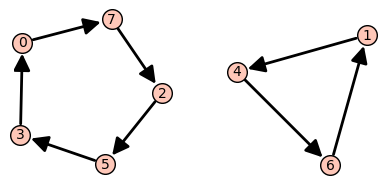

In [18]:
S = ['2','5'];
Sc = ['0','3','7','4','6','1'];
elist = [];
for u in S:
    for v in Sc:
        if G2.has_edge(u,v):
            elist.append( (u,v) );

p2.add_constraint( sum( x[edge_labels[e]] for e in elist) >= 1 );
show(p2.solve());
vals = p2.get_values(x);
H2 = DiGraph();


for u,v,l in G2.edges():
    if vals[ edge_labels[ (u,v) ] ] > 0:
        H2.add_edge(u,v);
    if vals[ edge_labels[ (v,u) ] ] > 0:
        H2.add_edge(v,u);
H2.show();

In [19]:
p.show()

Minimization:
  33.0 x_0 + 33.0 x_1 + 27.0 x_2 + 27.0 x_3 + 12.0 x_4 + 12.0 x_5 + 41.0 x_6 + 41.0 x_7 + 39.0 x_8 + 39.0 x_9 + 43.0 x_10 + 43.0 x_11 + 22.0 x_12 + 22.0 x_13 + 37.0 x_14 + 37.0 x_15 + 41.0 x_16 + 41.0 x_17 + 28.0 x_18 + 28.0 x_19 + 30.0 x_20 + 30.0 x_21 + 17.0 x_22 + 17.0 x_23 + 25.0 x_24 + 25.0 x_25 + 34.0 x_26 + 34.0 x_27 + 38.0 x_28 + 38.0 x_29 + 26.0 x_30 + 26.0 x_31 + 31.0 x_32 + 31.0 x_33 + 29.0 x_34 + 29.0 x_35 + 43.0 x_36 + 43.0 x_37 + 27.0 x_38 + 27.0 x_39 + 34.0 x_40 + 34.0 x_41 + 29.0 x_42 + 29.0 x_43 + 36.0 x_44 + 36.0 x_45 + 29.0 x_46 + 29.0 x_47 + 41.0 x_48 + 41.0 x_49 + 43.0 x_50 + 43.0 x_51 + 32.0 x_52 + 32.0 x_53 + 40.0 x_54 + 40.0 x_55 

Constraints:
  1.0 <= x_0 + x_2 + x_4 + x_6 + x_8 + x_10 + x_12 <= 1.0
  1.0 <= x_1 + x_3 + x_5 + x_7 + x_9 + x_11 + x_13 <= 1.0
  1.0 <= x_1 + x_14 + x_16 + x_18 + x_20 + x_22 + x_24 <= 1.0
  1.0 <= x_0 + x_15 + x_17 + x_19 + x_21 + x_23 + x_25 <= 1.0
  1.0 <= x_3 + x_15 + x_26 + x_28 + x_30 + x_32 + x_34 <= 1.0
  1.0 <

Tras añadir la restricción x_1 + x_7 + x_11 + x_14 + x_16 + x_20 + x_24 + x_29 + x_33 + x_37 + x_41 + x_44 + x_48 + x_51 + x_54 => 1.0 hemos reducido el número de subtours y ha aumentado el valor de la función objetivo. Seguimos añadiendo restricciones de corte

198.0

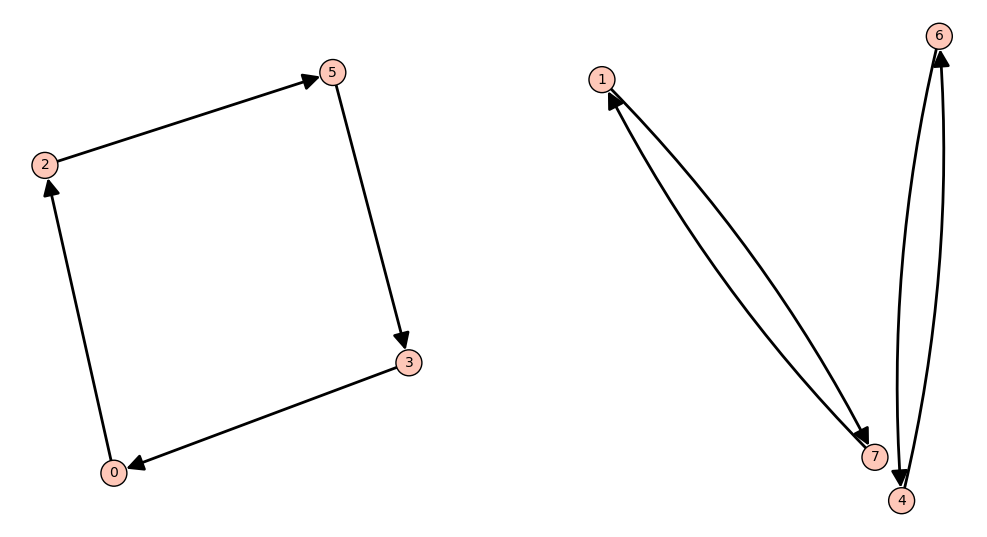

In [20]:
S = ['1','4','6'];
Sc = ['0','3','7','2','5'];
elist = [];
for u in S:
    for v in Sc:
        if G2.has_edge(u,v):
            elist.append( (u,v) );

p2.add_constraint( sum( x[edge_labels[e]] for e in elist) >= 1 );
show(p2.solve());
vals = p2.get_values(x);
H2 = DiGraph();


for u,v,l in G2.edges():
    if vals[ edge_labels[ (u,v) ] ] > 0:
        H2.add_edge(u,v);
    if vals[ edge_labels[ (v,u) ] ] > 0:
        H2.add_edge(v,u);
H2.show(figsize=10);

In [21]:
p.show()

Minimization:
  33.0 x_0 + 33.0 x_1 + 27.0 x_2 + 27.0 x_3 + 12.0 x_4 + 12.0 x_5 + 41.0 x_6 + 41.0 x_7 + 39.0 x_8 + 39.0 x_9 + 43.0 x_10 + 43.0 x_11 + 22.0 x_12 + 22.0 x_13 + 37.0 x_14 + 37.0 x_15 + 41.0 x_16 + 41.0 x_17 + 28.0 x_18 + 28.0 x_19 + 30.0 x_20 + 30.0 x_21 + 17.0 x_22 + 17.0 x_23 + 25.0 x_24 + 25.0 x_25 + 34.0 x_26 + 34.0 x_27 + 38.0 x_28 + 38.0 x_29 + 26.0 x_30 + 26.0 x_31 + 31.0 x_32 + 31.0 x_33 + 29.0 x_34 + 29.0 x_35 + 43.0 x_36 + 43.0 x_37 + 27.0 x_38 + 27.0 x_39 + 34.0 x_40 + 34.0 x_41 + 29.0 x_42 + 29.0 x_43 + 36.0 x_44 + 36.0 x_45 + 29.0 x_46 + 29.0 x_47 + 41.0 x_48 + 41.0 x_49 + 43.0 x_50 + 43.0 x_51 + 32.0 x_52 + 32.0 x_53 + 40.0 x_54 + 40.0 x_55 

Constraints:
  1.0 <= x_0 + x_2 + x_4 + x_6 + x_8 + x_10 + x_12 <= 1.0
  1.0 <= x_1 + x_3 + x_5 + x_7 + x_9 + x_11 + x_13 <= 1.0
  1.0 <= x_1 + x_14 + x_16 + x_18 + x_20 + x_22 + x_24 <= 1.0
  1.0 <= x_0 + x_15 + x_17 + x_19 + x_21 + x_23 + x_25 <= 1.0
  1.0 <= x_3 + x_15 + x_26 + x_28 + x_30 + x_32 + x_34 <= 1.0
  1.0 <

Al añadir una restricción al conjunto [1,4,6] ha aumentado el número de subtours, pero ha aumentado también el valor de la función objetivo. Seguimos añadiendo restricciones

In [22]:
S = ['1','7'];
Sc = ['0','3','2','4','6','5'];
elist = [];
for u in S:
    for v in Sc:
        if G2.has_edge(u,v):
            elist.append( (u,v) );

p2.add_constraint( sum( x[edge_labels[e]] for e in elist) >= 1 );
vals = p2.get_values(x);
H2 = DiGraph();


for u,v,l in G2.edges():
    if vals[ edge_labels[ (u,v) ] ] > 0:
        H2.add_edge(u,v);
    if vals[ edge_labels[ (v,u) ] ] > 0:
        H2.add_edge(v,u);
p2.show()

200.0

Minimization:
  33.0 x_0 + 33.0 x_1 + 27.0 x_2 + 27.0 x_3 + 12.0 x_4 + 12.0 x_5 + 41.0 x_6 + 41.0 x_7 + 39.0 x_8 + 39.0 x_9 + 43.0 x_10 + 43.0 x_11 + 25.0 x_12 + 25.0 x_13 + 37.0 x_14 + 37.0 x_15 + 41.0 x_16 + 41.0 x_17 + 28.0 x_18 + 28.0 x_19 + 30.0 x_20 + 30.0 x_21 + 20.0 x_22 + 20.0 x_23 + 25.0 x_24 + 25.0 x_25 + 34.0 x_26 + 34.0 x_27 + 38.0 x_28 + 38.0 x_29 + 24.0 x_30 + 24.0 x_31 + 31.0 x_32 + 31.0 x_33 + 29.0 x_34 + 29.0 x_35 + 41.0 x_36 + 41.0 x_37 + 27.0 x_38 + 27.0 x_39 + 34.0 x_40 + 34.0 x_41 + 29.0 x_42 + 29.0 x_43 + 36.0 x_44 + 36.0 x_45 + 29.0 x_46 + 29.0 x_47 + 41.0 x_48 + 41.0 x_49 + 43.0 x_50 + 43.0 x_51 + 32.0 x_52 + 32.0 x_53 + 40.0 x_54 + 40.0 x_55 

Constraints:
  1.0 <= x_0 + x_2 + x_4 + x_6 + x_8 + x_10 + x_12 <= 1.0
  1.0 <= x_1 + x_3 + x_5 + x_7 + x_9 + x_11 + x_13 <= 1.0
  1.0 <= x_1 + x_14 + x_16 + x_18 + x_20 + x_22 + x_24 <= 1.0
  1.0 <= x_0 + x_15 + x_17 + x_19 + x_21 + x_23 + x_25 <= 1.0
  1.0 <= x_3 + x_15 + x_26 + x_28 + x_30 + x_32 + x_34 <= 1.0
  1.0 <

Al añadir las restricciones x_3 + x_9 + x_15 + x_21 + x_26 + x_28 + x_32 + x_34 + x_39 + x_45 + x_50 + x_52 => 1.0, x_1 + x_13 + x_14 + x_16 + x_18 + x_20 + x_22 + x_35 + x_43 + x_49 + x_53 + x_55 => 1.0 obtenemos la solución del problema

In [ ]:
show(p2.solve());
H2.show()

| Iter. | Subciclo | Restriccion | Z |
|:----:|:----:|:----:|:----:|
| 1 | 0 - 3 | x_0 + x_2 + x_6 + x_8 + x_10 + x_12 + x_17 + x_27 + x_36 + x_38 + x_40 + x_42 => 1.0 | 191 |
| 2 | 2 - 5 | x_1 + x_7 + x_11 + x_14 + x_16 + x_20 + x_24 + x_29 + x_33 + x_37 + x_41 + x_44 + x_48 + x_51 + x_54 => 1.0 | 194 |
| 3 | 1 - 4 - 6 | x_1 + x_7 + x_11 + x_14 + x_16 + x_20 + x_24 + x_29 + x_33 + x_37 + x_41 + x_44 + x_48 + x_51 + x_54 => 1.0 | 198 |
| 4 | 1 - 7 | x_3 + x_9 + x_15 + x_21 + x_26 + x_28 + x_32 + x_34 + x_39 + x_45 + x_50 + x_52 => 1.0, x_1 + x_13 + x_14 + x_16 + x_18 + x_20 + x_22 + x_35 + x_43 + x_49 + x_53 + x_55 => 1.0 | 200 |

<h3>Ejercicio 2</h3>

<h3>Apartado a</h3>

Modelado problema del conjunto máximo independiente

<h4>Variables:</h4> 

Las variables son binarias y representan los vértices del grafo

<h4>Restricciones:</h4>

Para obtener un conjunto independiente, los vértices no pueden ser adyacentes, por lo tanto, los vecinos de un vértices no pueden ser elegidos

<h4>Función objetivo</h4>

Buscamos obtener el conjunto de vértices independientes más grande

In [23]:
p = MixedIntegerLinearProgram(maximization=True);

x = p.new_variable();

#Diccionario con las variables y su indice
vertex_labels = {};

#Contador para las variables
vcount = 0;

#Variables
for v in G.vertices():
    vertex_labels[v] = vcount;
    #Asignamos un entero a la variable para identificarla
    p.set_integer(x[vcount]);
    #Declaramos el valor menor que puede tener cada variable
    p.set_min(x[vcount],0);
    #Declaramos el valor mayor que puede tener cada variable
    p.set_max(x[vcount],1);
    vcount += 1;

#Restricciones    
for u in G.vertices():
     for v in G.neighbors(u):
            p.add_constraint(x[vertex_labels[(u)]] + x[vertex_labels[(v)]] <= 1);

#Función objetivo
p.set_objective(sum ( x[vertex_labels[(v)]] for v in G.vertices())); 

<h3>Apartado b</h3>

A continuación, resolveremos el problema para el grafo de Herschel

In [24]:
G = graphs.ChvatalGraph()

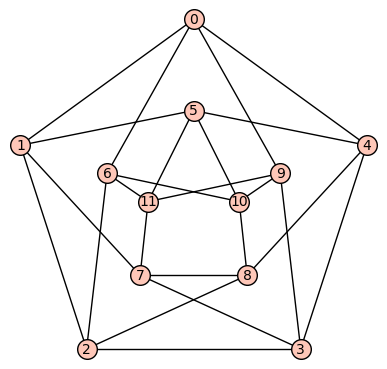

In [25]:
G.show();

In [26]:
p = MixedIntegerLinearProgram(maximization=True);

x = p.new_variable();

#Diccionario con las variables y su indice
vertex_labels = {};

#Contador para las variables
vcount = 0;

#Variables
for v in G.vertices():
    vertex_labels[v] = vcount;
    #Asignamos un entero a la variable para identificarla
    p.set_integer(x[vcount]);
    #Declaramos el valor menor que puede tener cada variable
    p.set_min(x[vcount],0);
    #Declaramos el valor mayor que puede tener cada variable
    p.set_max(x[vcount],1);
    vcount += 1;

#Restricciones    
for u in G.vertices():
     for v in G.neighbors(u):
            p.add_constraint(x[vertex_labels[(u)]] + x[vertex_labels[(v)]] <= 1);

#Función objetivo
p.set_objective(sum ( x[vertex_labels[(v)]] for v in G.vertices())); 

In [27]:
p.show()

Maximization:
  x_0 + x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 + x_10 + x_11 

Constraints:
  x_0 + x_1 <= 1.0
  x_0 + x_4 <= 1.0
  x_0 + x_6 <= 1.0
  x_0 + x_9 <= 1.0
  x_0 + x_1 <= 1.0
  x_1 + x_2 <= 1.0
  x_1 + x_5 <= 1.0
  x_1 + x_7 <= 1.0
  x_1 + x_2 <= 1.0
  x_2 + x_3 <= 1.0
  x_2 + x_6 <= 1.0
  x_2 + x_8 <= 1.0
  x_2 + x_3 <= 1.0
  x_3 + x_4 <= 1.0
  x_3 + x_7 <= 1.0
  x_3 + x_9 <= 1.0
  x_0 + x_4 <= 1.0
  x_3 + x_4 <= 1.0
  x_4 + x_5 <= 1.0
  x_4 + x_8 <= 1.0
  x_1 + x_5 <= 1.0
  x_4 + x_5 <= 1.0
  x_5 + x_10 <= 1.0
  x_5 + x_11 <= 1.0
  x_0 + x_6 <= 1.0
  x_2 + x_6 <= 1.0
  x_6 + x_10 <= 1.0
  x_6 + x_11 <= 1.0
  x_1 + x_7 <= 1.0
  x_3 + x_7 <= 1.0
  x_7 + x_8 <= 1.0
  x_7 + x_11 <= 1.0
  x_2 + x_8 <= 1.0
  x_4 + x_8 <= 1.0
  x_7 + x_8 <= 1.0
  x_8 + x_10 <= 1.0
  x_0 + x_9 <= 1.0
  x_3 + x_9 <= 1.0
  x_9 + x_10 <= 1.0
  x_9 + x_11 <= 1.0
  x_5 + x_10 <= 1.0
  x_6 + x_10 <= 1.0
  x_8 + x_10 <= 1.0
  x_9 + x_10 <= 1.0
  x_5 + x_11 <= 1.0
  x_6 + x_11 <= 1.0
  x_7 + x

In [28]:
p.solve()

4.0

Hemos obtenido un conjunto de vértices independientes con 4 vértices independientes entre sí.

A continuación, mostramos cuales son los vértices. Los vértices elegidos son los que tienen valor 1.

In [29]:
p.get_values(x)

{0: 1.0,
 1: 0.0,
 2: 1.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 1.0,
 11: 1.0}